In [ ]:
!pip install tensorflow_io
! pip install soundfile
! pip install pygame

     |████████████████████████████████| 2.1 MB 6.3 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 14.8 MB 60.2 MB/s            
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=77051 sha256=fc9a5751640eb3aaca4dc6cbd87424476c64117fd2a8bcde4f951fc59e4a16de
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Attempting uninstall: wrapt
    Found

In [ ]:
#import required libraries
from tensorflow.keras.layers import Dense, Permute, Reshape, Input
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.layers import Dense, Permute, Reshape, Dropout
from tensorflow.keras.layers import Convolution2D, ReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit, cross_val_score
import tensorflow_addons as tfa
import os
import tensorflow as tf
import pathlib
import tensorflow_io as tfio
import librosa
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
from PIL import Image
# import pyworld as pw
from tqdm import tqdm
import seaborn as sns
import pandas as pd
#from dataloader import test_data, test_labels, train_data, train_labels, val_data, val_labels
from sklearn.metrics import classification_report
from tensorflow.keras.models import Model, load_model
from sklearn.utils import shuffle
import soundfile as sf
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

In [ ]:
from PIL import Image,ImageOps
import os
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from torchvision import models
import random
import itertools
from tqdm import tqdm
import time
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import torch.optim as optim
from skimage import io, transform
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import librosa
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import librosa.display
from pydub import AudioSegment
from pydub.playback import play

Visualization

Sampling rate 16000


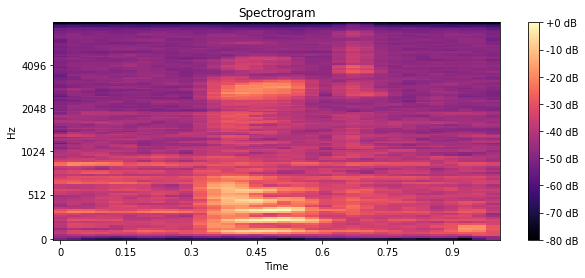

In [ ]:
# Path to the audio file
file_path = "/kaggle/input/sc09-dataset/data/train/Eight_01b4757a_nohash_0.wav"
# Load the audio file and get the sampling rate
audio, sample_rate = librosa.load(file_path, sr=None)

# Print the sampling rate for reference
print("Sampling rate:", sample_rate)

# Compute the mel spectrogram
spectrogram = librosa.feature.melspectrogram(audio, sr=sample_rate)
# Convert the spectrogram to a log scale for better visualization
log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)

# Visualize the spectrogram using matplotlib and librosa.display
plt.figure(figsize=(10, 4))
librosa.display.specshow(log_spectrogram, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()


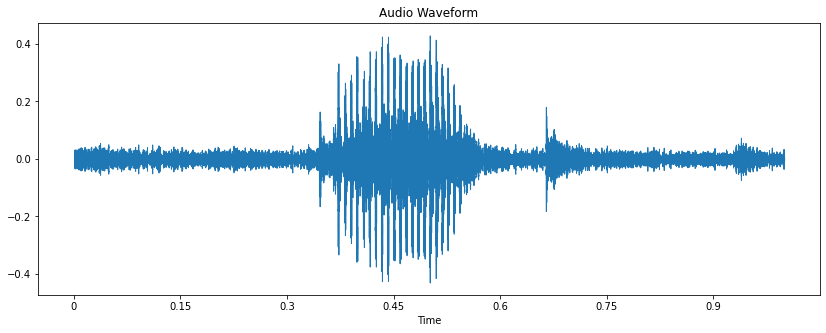

In [ ]:
#Visualize the audio waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(audio, sr=sample_rate)
plt.title('Audio Waveform')
plt.show()

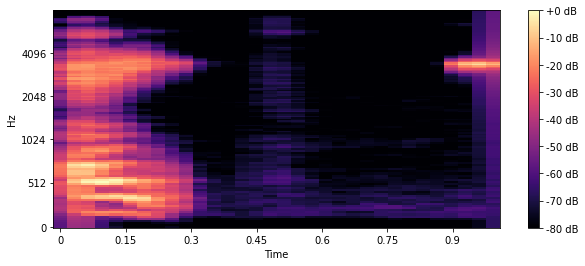

In [ ]:
# Path to the audio file
file_path = "/kaggle/input/sc09-dataset/data/train/Eight_01bcfc0c_nohash_2.wav"

# Load the audio file and get the sampling rate
audio, sample_rate = librosa.load(file_path, sr=None)
# Compute the mel spectrogram
spectrogram = librosa.feature.melspectrogram(audio, sr=sample_rate)
# Convert the spectrogram to a log scale for better visualization
log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)

# Visualize the mel spectrogram using matplotlib and librosa.display
plt.figure(figsize=(10, 4))
librosa.display.specshow(log_spectrogram, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.show()

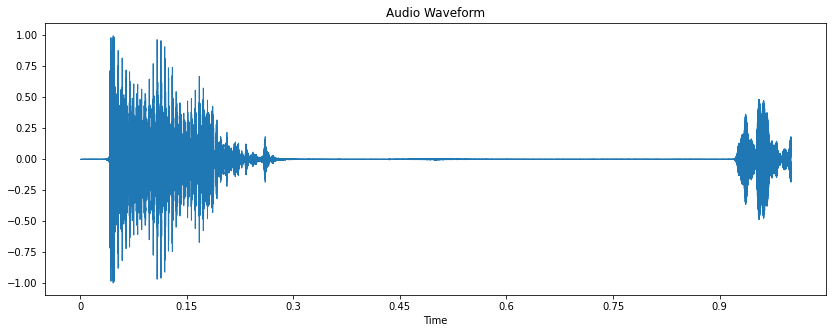

In [ ]:
#Visualize the audio waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(audio, sr=sample_rate)
plt.title('Audio Waveform')
plt.show()

In [ ]:
# Define paths for the training, testing, and validation datasets
TRAIN_DATASET_PATH = "/kaggle/input/sc09-dataset/data/train"
TEST_DATASET_PATH = "/kaggle/input/sc09-dataset/data/test"
VAL_DATASET_PATH = "/kaggle/input/sc09-dataset/data/valid"

# Define a list of label names corresponding to numerical digits
label_names = ["Zero", "One", "Two", "Three", "Four", "Five", "Six", "Seven", "Eight", "Nine"]


In [ ]:
# TensorFlow constant for automatic tuning during data loading
AUTOTUNE = tf.data.AUTOTUNE

# Sampling rate for audio data
SAMPLE_RATE = 16000

# Retrieve file paths for training, validation, and test datasets
train_files = glob.glob(os.path.join(TRAIN_DATASET_PATH, "**/*.wav"), recursive=True)
val_files = glob.glob(os.path.join(VAL_DATASET_PATH, "**/*.wav"), recursive=True)

# Print the number of training files for verification
print(len(train_files))

# Convert file paths to NumPy arrays
train_files = np.array(train_files)

# Extract labels from the file paths for training and validation sets
train_labels = [name.split("/")[5].split("_")[0] for name in train_files]
val_labels = [name.split("/")[5].split("_")[0] for name in val_files]

# Print an example file path and its corresponding label
print(train_files[0], train_labels[0])

# Retrieve file paths and labels for the test dataset
test_files = np.array(glob.glob(os.path.join(TEST_DATASET_PATH, "**/*.wav"), recursive=True))
test_labels = [name.split("/")[5].split("_")[0] for name in test_files]

# Print the sizes of the training, validation, and test sets
print('Training set size:', len(train_files))
print('Validation set size:', len(val_files))
print('Test set size:', len(test_files))


18620
/kaggle/input/sc09-dataset/data/train/Six_190821dc_nohash_4.wav train
Training set size 18620
Validation set size 2494
Test set size 2552


In [ ]:
# import os

# # Output directory for the spectrogram images
# output_dir = "/kaggle/working/train_set"

# # Count the number of saved images
# saved_images_count = sum(1 for file in os.listdir(output_dir) if file.endswith(".png"))

# print(f"Number of saved images: {saved_images_count}")


In [ ]:
# Path to the directory containing the training audio files
train_dir = "/kaggle/input/sc09-dataset/data/train"

# Output directory for the spectrogram images
output_dir = "/kaggle/working/train_set"

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Maximum number of images to save
max_images = 4000

# List of audio files in the training set
audio_files = [filename for filename in os.listdir(train_dir) if filename.endswith(".wav")]

# Randomly sample audio files
selected_files = random.sample(audio_files, min(max_images, len(audio_files)))

# Counter for the number of saved images
image_count = 0

# Iterate through randomly selected audio files
for filename in selected_files:
    file_path = os.path.join(train_dir, filename)

    # Load audio file
    audio, sample_rate = librosa.load(file_path, sr=None)

    # Compute spectrogram
    spectrogram = librosa.feature.melspectrogram(audio, sr=sample_rate)
    log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)

    # Visualize and save the spectrogram as an image without axis labels and color bar
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(log_spectrogram, sr=sample_rate, x_axis=None, y_axis=None)
    plt.axis('off')  # Turn off axis labels
    plt.colorbar(format='%+2.0f dB', pad=0)  # Turn off color bar
    plt.savefig(os.path.join(output_dir, f'{filename.split(".")[0]}.png'), bbox_inches='tight', pad_inches=0)
    plt.close()

    # Increment the image count
    image_count += 1
    if(image_count%100==0):
        print(image_count)

# Optionally, you can also save the labels for reference
labels_file_path = os.path.join(output_dir, "labels.txt")
with open(labels_file_path, "w") as f:
    for filename in selected_files:
        f.write(f'{filename.split(".")[0]}.png\n')

print(f"Spectrogram images saved to {output_dir}")

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
Spectrogram images saved to /kaggle/working/train_set


In [ ]:
# Check if a GPU is available, and set the device accordingly

if torch.cuda.is_available():
  device=torch.device("cuda:0")
else:
  device=torch.device("cpu")

#print available device
device

device(type='cuda', index=0)

In [ ]:
#Transforming the image by resizing it into 128*128 making it lesser expensive, and further normalizing it
transform = transforms.Compose([transforms.Resize((256, 256)),
#                                 transforms.CenterCrop(256),
                                transforms.ToTensor(),
                            transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229, 0.224, 0.225])])
#Denormalization transformation
denorm = transforms.Compose([
     transforms.Normalize(mean=[-0.485,-0.456,-0.406],std=[1/0.229, 1/0.224, 1/0.225])])


In [ ]:
# Define a custom dataset class for images
class ImageDataset(Dataset):
    def __init__(self, images_list, transform=None):
        """
        Initialize the ImageDataset.
        Parameters:
        - images_list (list): List of file paths to the images.
        - transform (callable, optional): Optional transformation to be applied to the images.
        """
        self.images_list = images_list
        self.transform = transform

    def __len__(self):
        """
        Get the number of images in the dataset.
        """
        return len(self.images_list)

    def __getitem__(self, index):
        """
        Get an image and its corresponding label from the dataset.
        """
        image_path = self.images_list[index]
        image = Image.open(image_path).convert('RGB')

        # Apply the specified transformation if provided
        if self.transform:
            image = self.transform(image)

        return image

# Specify the path to the directory containing the images
train_set_path = "/kaggle/working/train_set"


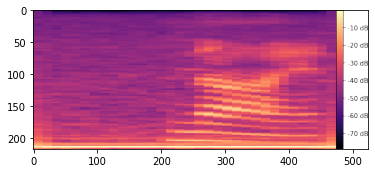

In [ ]:
# Create a list of file paths for images with a ".png" extension in the specified directory
image_paths_list = [os.path.join(train_set_path, filename) for filename in os.listdir(train_set_path) if filename.endswith(".png")]
# Specify batch size
batch_size = 32
image_dataset = ImageDataset(image_paths_list, transform)
# Create DataLoader
dataloader = DataLoader(image_dataset, batch_size=batch_size, shuffle=True)
#testing the traindataset
plt.imshow(image_dataset.__getitem__(2).numpy().transpose(1,2,0))
image_dataset.__getitem__(2).numpy().transpose(1,2,0).shape

image_path = image_paths_list.__getitem__(2)
image = Image.open(image_path)

plt.imshow(image)
plt.show()

In [ ]:
# Print the first 16 image paths from the image_paths_list
for i in range(16):
    print(image_paths_list[i])

/kaggle/working/train_set/Zero_f953e1af_nohash_0.png
/kaggle/working/train_set/Two_c1d39ce8_nohash_6.png
/kaggle/working/train_set/Nine_62605293_nohash_2.png
/kaggle/working/train_set/Five_6414258b_nohash_0.png
/kaggle/working/train_set/Eight_87728a88_nohash_0.png
/kaggle/working/train_set/Four_435f9f9e_nohash_0.png
/kaggle/working/train_set/Eight_b8897f1c_nohash_0.png
/kaggle/working/train_set/Two_dc269564_nohash_0.png
/kaggle/working/train_set/Eight_c634a189_nohash_2.png
/kaggle/working/train_set/Five_2b3f509b_nohash_0.png
/kaggle/working/train_set/Eight_324210dd_nohash_2.png
/kaggle/working/train_set/One_b959cd0c_nohash_4.png
/kaggle/working/train_set/Three_3209ec42_nohash_0.png
/kaggle/working/train_set/Eight_7cb5c0b7_nohash_0.png
/kaggle/working/train_set/Six_2b3f509b_nohash_1.png
/kaggle/working/train_set/Eight_12c206ea_nohash_0.png


In [ ]:
class Generator(nn.Module):
    def __init__(self, latent_size):
        """
        Initialize the Generator module.
        """
        super(Generator, self).__init__()

        # Define the layers for the generator
        # We would be generating 256*256 images in RGB channel, thus would need more ConvTranspose layers
        self.main = nn.Sequential(
            nn.ConvTranspose2d(in_channels=latent_size, out_channels=1024, kernel_size=4, stride=1, padding=0),
            nn.BatchNorm2d(1024),
            nn.ReLU(),  # 4x4

            nn.ConvTranspose2d(in_channels=1024, out_channels=512, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),  # 8x8

            nn.ConvTranspose2d(in_channels=512, out_channels=256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),  # 16x16

            nn.ConvTranspose2d(in_channels=256, out_channels=128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),  # 32x32

            nn.ConvTranspose2d(in_channels=128, out_channels=64, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),  # 64x64

            nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),  # 128x128

            nn.ConvTranspose2d(in_channels=32, out_channels=3, kernel_size=4, stride=2, padding=1),
            nn.Tanh()  # 256x256
        )

    def forward(self, x):
        """
        Forward pass through the generator.
        """
        # Outputting a 3x256x256 image
        x = self.main(x)
        return x


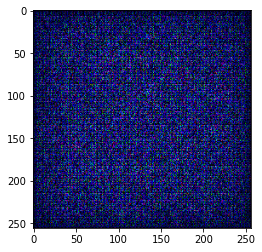

In [ ]:
# Clear GPU memory cache to free up memory
torch.cuda.empty_cache()
# Instantiate the Generator and move it to the specified device (GPU if available)
GeneratorI = Generator(256).to(device)
# Generate random noise according to the batch size of 32 and image size of 128x128
noise = torch.randn(32, 256, 1, 1).to(device)

# Test the Generator, note that the generated image may look random as the weights are not trained yet
fake_images = GeneratorI(noise)
# Display one of the generated images
plt.imshow(fake_images[0].detach().cpu().numpy().transpose(1, 2, 0))

In [ ]:
# Define a function to display a grid of images
def show_images(images, nmax=64):
    """
    Display a grid of images.

    Parameters:
    - images (torch.Tensor): Tensor containing images.
    - nmax (int, optional): Maximum number of images to display. Default is 64.

    """
    # Create a subplot with no axis ticks
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks([]); ax.set_yticks([])

    # Display the images using make_grid
    ax.imshow(make_grid(images.detach()[:nmax], nrow=8).cpu().permute(1, 2, 0))


In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        """
        Initialize the Discriminator module.
        """
        super(Discriminator, self).__init__()

        # Define the layers for the discriminator
        self.main = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=4, stride=2, padding=1),  # 128*128
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=4, stride=2, padding=1),  # 64*64
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=4, stride=2, padding=1),  # 32*32
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=4, stride=2, padding=1),  # 16*16
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=4, stride=2, padding=1),  # 8*8
            nn.BatchNorm2d(1024),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(in_channels=1024, out_channels=1, kernel_size=4, stride=2, padding=0),  # 4*4
            nn.Flatten(),
            nn.Sigmoid()
        )

    def forward(self, x):
        """
        Forward pass through the discriminator.
        """
        x = self.main(x)
        return x

DiscriminatorI=Discriminator().to(device)

In [ ]:
# Initialize Adam optimizer for the discriminator with a learning rate of 0.0002 and betas (0.5, 0.999)
optimizerd = optim.Adam(DiscriminatorI.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Initialize Adam optimizer for the generator with a learning rate of 0.0002 and betas (0.5, 0.999)
optimizerg = optim.Adam(GeneratorI.parameters(), lr=0.0002, betas=(0.5, 0.999))


In [ ]:
# Define binary cross-entropy loss
loss_fn = nn.BCELoss()

# Define a function for computing the real loss with added label noise
def Real_loss(preds, targets):
    """
    Compute the real loss with added label noise.
    """
    # Drawing label noise from a beta distribution
    beta_distr = torch.distributions.beta.Beta(1, 5, validate_args=None)
    label_noise = beta_distr.sample(sample_shape=targets.shape).to(torch.device(device))

    # Compute the real loss with added label noise
    loss = loss_fn(targets, preds - label_noise)
    return loss

# Define a function for computing the fake loss with added label noise
def Fake_loss(preds, targets):
    """
    Compute the fake loss with added label noise.
    """
    # Drawing label noise from the beta distribution
    beta_distr = torch.distributions.beta.Beta(1, 5, validate_args=None)
    label_noise = beta_distr.sample(sample_shape=targets.shape).to(torch.device(device))

    # Compute the fake loss with added label noise
    loss = loss_fn(targets, preds + label_noise)
    return loss


In [ ]:
# Set batch size and latent size
batch_size = 32
latent_size = 256

# Lists to store losses and scores during training
losses_g = []
losses_d = []
real_scores = []
fake_scores = []

def train(D, G, epochs):
    """
    Train the GAN model.

    Parameters:
    - D (nn.Module): Discriminator model.
    - G (nn.Module): Generator model.
    - epochs (int): Number of training epochs.
    """
    # Iterate over epochs
    for epoch in range(epochs):
        j = 0
        # Iterate over batches in the dataloader
        for real_images in dataloader:
            j += 1
            real_images = real_images.to(device)

            # Pass real images through discriminator
            D_out_real = D(real_images)
            label_real = torch.full(D_out_real.shape, 1.0).to(torch.device(device))
            real_loss = Real_loss(label_real, D_out_real)
            real_score = torch.mean(D_out_real).item()

            # Generate fake images
            noise = torch.randn(batch_size, latent_size, 1, 1).to(torch.device(device))
            fake_images = G(noise)

            # Pass fake images through discriminator
            D_out_fake = D(fake_images)
            label_fake = torch.full(D_out_fake.shape, 0).to(torch.device(device))
            fake_loss = Fake_loss(label_fake, D_out_fake)
            fake_score = torch.mean(D_out_fake).item()

            # Update discriminator weights
            loss_d = real_loss + fake_loss
            optimizerd.zero_grad()
            loss_d.backward(retain_graph=True)
            optimizerd.step()

            # Generate fake images for generator training
            noise2 = torch.randn(batch_size, latent_size, 1, 1).to(torch.device(device))
            fake_images2 = G(noise2)

            gen_steps = 1
            for i in range(gen_steps):
                # Try to fool the discriminator
                D_out_fake2 = D(fake_images2)

                # The label is set to 1 (real-like) to fool the discriminator
                label_real1 = torch.full(D_out_fake2.shape, 1.0).to(torch.device(device))
                loss_g = Real_loss(label_real1, D_out_fake2)

                # Update generator weights
                optimizerg.zero_grad()
                loss_g.backward(retain_graph=(i < gen_steps - 1))
                optimizerg.step()

            print(f"\rProgress: {j}/{len(dataloader)}", end='')

        # Log losses & scores (last batch)
        losses_g.append(loss_g.item())
        losses_d.append(loss_d.item())
        real_scores.append(real_score)
        fake_scores.append(fake_score)

        # Log training progress for the epoch
        print("\nEpoch [{}/{}], loss_g: {:.4f}, loss_d: {:.4f}, real_score: {:.4f}, fake_score: {:.4f}".format(
            epoch + 1, epochs, loss_g, loss_d, real_score, fake_score))

# Example usage:
# train(DiscriminatorI, GeneratorI, epochs=10)


In [ ]:
#Training the Generator and Dicriminator for 20 epochs
train(DiscriminatorI,GeneratorI,20)

Progress: 125/125 
Epoch [1/20], loss_g: 2.8315, loss_d: 0.9912, real_score: 0.8069, fake_score: 0.3367
Progress: 125/125 
Epoch [2/20], loss_g: 1.3681, loss_d: 0.9165, real_score: 0.8020, fake_score: 0.1142
Progress: 125/125 
Epoch [3/20], loss_g: 1.6083, loss_d: 0.9131, real_score: 0.8394, fake_score: 0.1667
Progress: 125/125 
Epoch [4/20], loss_g: 1.5575, loss_d: 0.8830, real_score: 0.8334, fake_score: 0.1549
Progress: 125/125 
Epoch [5/20], loss_g: 1.4697, loss_d: 0.9077, real_score: 0.8311, fake_score: 0.1966
Progress: 125/125 
Epoch [6/20], loss_g: 1.5005, loss_d: 0.9224, real_score: 0.8239, fake_score: 0.1831
Progress: 125/125 
Epoch [7/20], loss_g: 1.3649, loss_d: 0.9367, real_score: 0.7895, fake_score: 0.1915
Progress: 125/125 
Epoch [8/20], loss_g: 1.6945, loss_d: 0.9289, real_score: 0.8374, fake_score: 0.1182
Progress: 125/125 
Epoch [9/20], loss_g: 1.4224, loss_d: 0.9140, real_score: 0.8385, fake_score: 0.1624
Progress: 125/125 
Epoch [10/20], loss_g: 1.5659, loss_d: 0.9591

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generator Loss values over 20 epochs
loss_g_values = [2.8315, 1.3681, 1.6083, 1.5575, 1.4697, 1.5005, 1.3649, 1.6945, 1.4224, 1.5659, 1.6489, 2.1721, 2.4409, 1.3518, 1.0917, 0.7588, 1.4144, 1.6383, 1.5869, 1.7615]

# Discriminator Loss values over 20 epochs
loss_d_values = [0.9912, 0.9165, 0.9131, 0.8830, 0.9077, 0.9224, 0.9367, 0.9289, 0.9140, 0.9591, 0.9300, 2.0082, 1.0397, 1.0343, 1.0426, 1.0366, 1.1107, 1.1450, 0.9256, 0.8731]

# Real Score values over 20 epochs
real_score_values = [0.8069, 0.8020, 0.8394, 0.8334, 0.8311, 0.8239, 0.7895, 0.8374, 0.8385, 0.8264, 0.7762, 0.9258, 0.8246, 0.7049, 0.7184, 0.7123, 0.7687, 0.8626, 0.7812, 0.7892]

# Fake Score values over 20 epochs
fake_score_values = [0.3367, 0.1142, 0.1667, 0.1549, 0.1966, 0.1831, 0.1915, 0.1182, 0.1624, 0.1414, 0.1505, 0.7976, 0.3915, 0.3494, 0.3653, 0.2993, 0.4452, 0.4850, 0.2093, 0.1374]

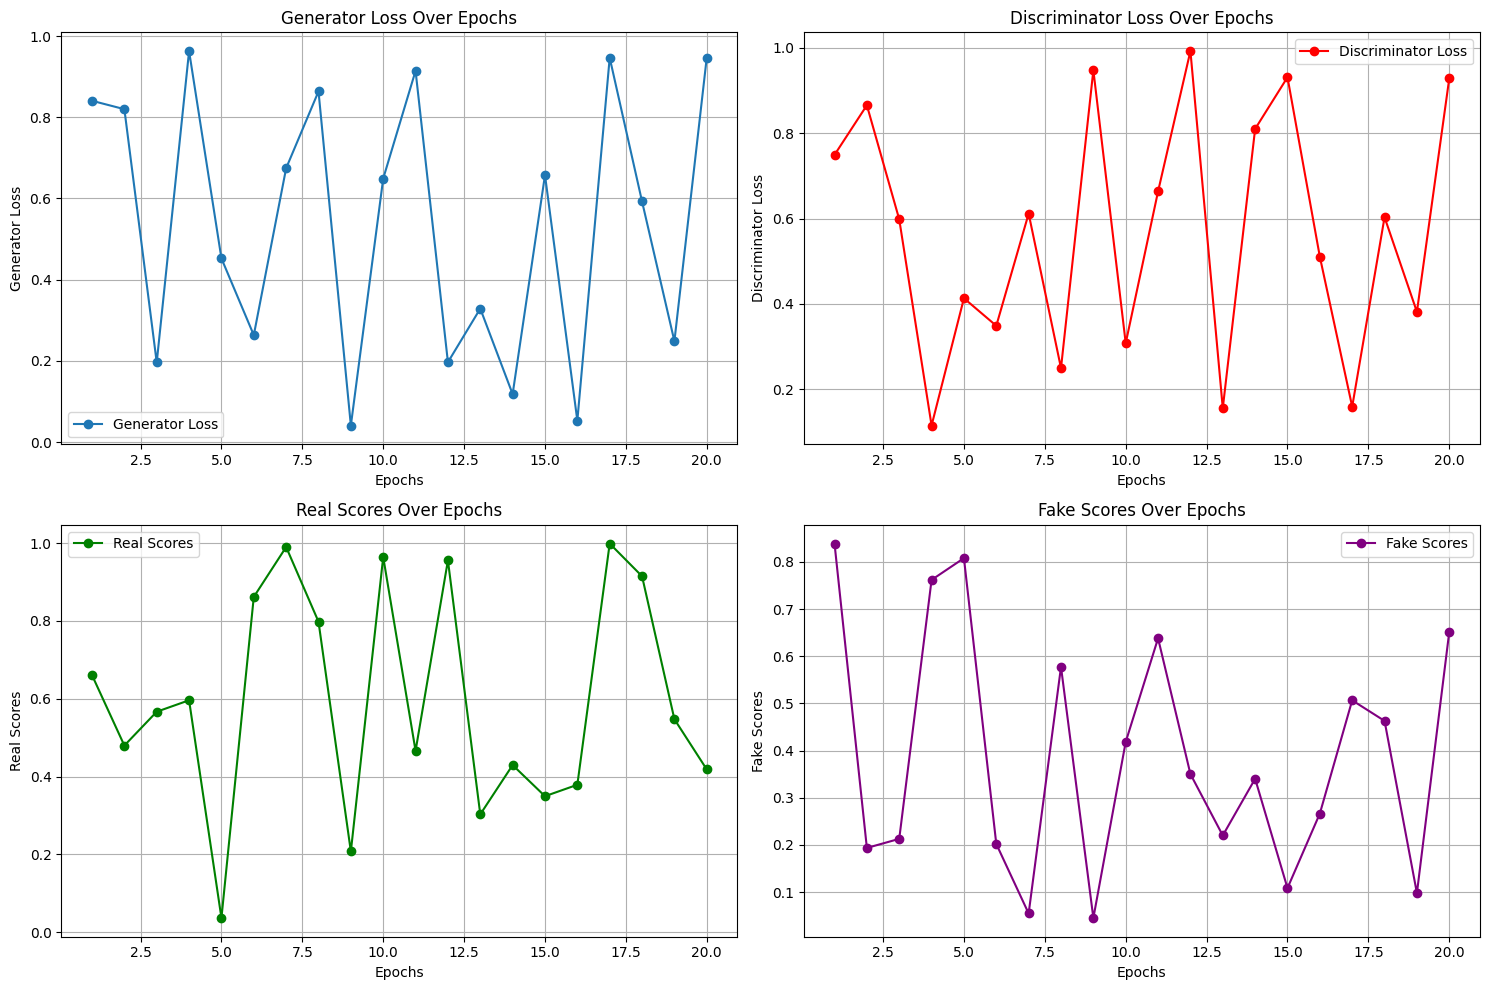

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Generate an array of epoch numbers (1 to 20)
epochs = np.arange(1, 21)

# Sample data (replace these with your actual data)
loss_g_values = np.random.rand(20)
loss_d_values = np.random.rand(20)
real_score_values = np.random.rand(20)
fake_score_values = np.random.rand(20)

# Plot all in one
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Generator Loss
axes[0, 0].plot(epochs, loss_g_values, label='Generator Loss', marker='o')
axes[0, 0].set_title('Generator Loss Over Epochs')
axes[0, 0].set_xlabel('Epochs')
axes[0, 0].set_ylabel('Generator Loss')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Discriminator Loss
axes[0, 1].plot(epochs, loss_d_values, label='Discriminator Loss', marker='o', color='r')
axes[0, 1].set_title('Discriminator Loss Over Epochs')
axes[0, 1].set_xlabel('Epochs')
axes[0, 1].set_ylabel('Discriminator Loss')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Real Scores
axes[1, 0].plot(epochs, real_score_values, label='Real Scores', marker='o', color='g')
axes[1, 0].set_title('Real Scores Over Epochs')
axes[1, 0].set_xlabel('Epochs')
axes[1, 0].set_ylabel('Real Scores')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Fake Scores
axes[1, 1].plot(epochs, fake_score_values, label='Fake Scores', marker='o', color='purple')
axes[1, 1].set_title('Fake Scores Over Epochs')
axes[1, 1].set_xlabel('Epochs')
axes[1, 1].set_ylabel('Fake Scores')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

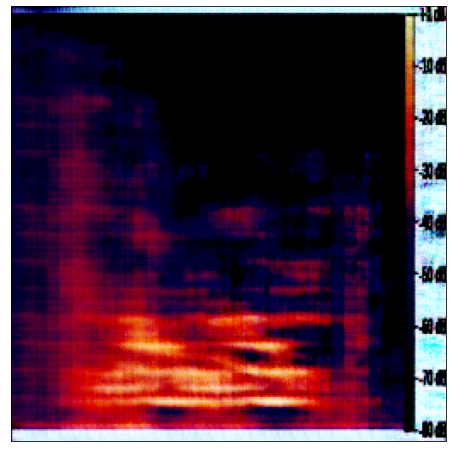

In [ ]:
#Random Noise to generate fake images
noise1 = torch.randn(1, 256, 1, 1).to(device)
#Generating fake images using the noise
fake_images=GeneratorI(noise1)
#Showing the fake images generated
show_images((fake_images))

In [ ]:
# Output path for the fake image
output_path = "/kaggle/working/fake_image3.png"  # Replace with the desired output path and filename

# Save the generated fake image
save_image(fake_images, output_path, normalize=True)


In [ ]:

# Load the mel spectrogram image
mel_spectrogram_image_path = "/kaggle/working/fake_image3.png"  # Replace with the actual path
mel_spectrogram = plt.imread(mel_spectrogram_image_path)

# Invert the power-to-db transformation
spectrogram = librosa.db_to_power(mel_spectrogram)

# Invert the mel spectrogram to a linear spectrogram
mel_basis = librosa.filters.mel(sr=44100, n_fft=2048, n_mels=256)
inv_mel_spectrogram = np.dot(np.linalg.pinv(mel_basis), spectrogram)

# Invert the linear spectrogram to the time-domain signal
audio_signal = librosa.feature.inverse.mel_to_audio(inv_mel_spectrogram, sr=44100, n_fft=2048, hop_length=512)

# Save the audio signal to a file
output_audio_path = "/kaggle/working/fake_audio3.wav"  # Replace with the desired output path
sf.write(output_audio_path, audio_signal, 44100)  # Adjust the sample rate if needed


In [ ]:
# Specify the path to your WAV file
wav_file_path = "/kaggle/working/fake_audio3.wav"

# Load the WAV file
audio = AudioSegment.from_wav(wav_file_path)

# Play the audio
play(audio)


[NULL @ 0x791a6c002700] Too many or invalid channels: 1024B f=0/0   
Input #0, wav, from '/tmp/tmpw968xirw.wav':
  Duration: 00:00:00.02, bitrate: 722538 kb/s
    Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 44100 Hz, 1024 channels, 722534 kb/s
[NULL @ 0x791a6c0436c0] Too many or invalid channels: 1024
Failed to open file '/tmp/tmpw968xirw.wav' or configure filtergraph


In [ ]:
CONFIG = {"train_data_dir": "data/Language Identification/spectrograms new/train",
        #   "validation_data_dir": "<path to dataset dir>/validation.csv",
          "test_data_dir": "data/Language Identification/spectrograms/test",
          "train_csv": "train.csv",
          "test_csv": "test.csv",

          "batch_size": 32,
          "learning_rate": 0.001,
          "num_epochs": 6,

          "data_loader": "ImageLoader",
          "color_mode": "L",  # L = bw or RGB,
          "input_shape": [128, 128, 1],

          "model": "topcoder_crnn_finetune",  # _finetune"

          "segment_length": 2,  # number of seconds each spectogram represents,
          "pixel_per_second": 125,

          "label_names": ["Zero", "One", "Two", "Three", "Four", "Five", "Six", "Seven", "Eight", "Nine"],
          "num_classes": 10,

          }